Action1	"基于评分卡的风控模型开发

数据集GiveMeSomeCredit，15万样本数据

https://www.kaggle.com/c/GiveMeSomeCredit/data

使用WOE进行特征变换，IV进行特征筛选，LR构建风控模型，并对模型评分规则进行可解释性说明 

–基本属性：包括了借款人当时的年龄

– 偿债能力：包括了借款人的月收入、负债比率

– 信用往来：两年内35-59天逾期次数、两年内60-89天逾期次数、两年内90天或高于90天逾期的次数

– 财产状况：包括了开放式信贷和贷款数量、不动产贷款或额度数量。

– 其他因素：包括了借款人的家属数量"	

"1、完成LR模型（30points）

2、对评分卡模型的规则进行说明（30points）"!

In [2]:
import pandas as pd

df_train = pd.read_csv('./cs-training.csv')
df_train = df_train.iloc[:,1:]
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


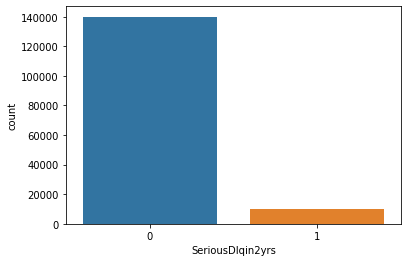

In [5]:
df_train['SeriousDlqin2yrs'].value_counts()
import seaborn as sns
sns.countplot(x='SeriousDlqin2yrs',data= df_train)

In [7]:
df_train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [9]:
df_train['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

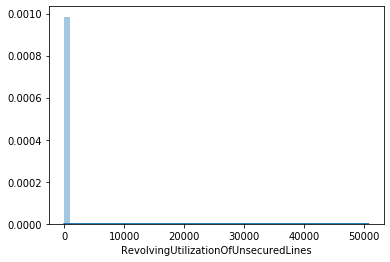

In [10]:
sns.distplot(df_train['RevolvingUtilizationOfUnsecuredLines'])

In [11]:
df_train.median()

SeriousDlqin2yrs                           0.000000
RevolvingUtilizationOfUnsecuredLines       0.154181
age                                       52.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.366508
MonthlyIncome                           5400.000000
NumberOfOpenCreditLinesAndLoans            8.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               1.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
dtype: float64

In [12]:
df_train = df_train.fillna(df_train.median())
df_train.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

# spliting

In [26]:
# age
import math
age_bins = [-math.inf, 25, 40, 50, 60 ,70, math.inf]
df_train['bin_ages'] = pd.cut(df_train['age'], bins= age_bins)
df_train[['age', 'bin_ages']]

,age,bin_ages
0,45,"(40.0, 50.0]"
1,40,"(25.0, 40.0]"
2,38,"(25.0, 40.0]"
3,30,"(25.0, 40.0]"
4,49,"(40.0, 50.0]"
...,...,...
149995,74,"(70.0, inf]"
149996,44,"(40.0, 50.0]"
149997,58,"(50.0, 60.0]"
149998,30,"(25.0, 40.0]"


In [16]:
# NumberOfDependents
dependent_bins = [-math.inf, 2, 4, 6, 8, 10, math.inf]
df_train['bin_NumberOfDependents'] = pd.cut(df_train['NumberOfDependents'], bins=dependent_bins)
df_train[['NumberOfDependents','bin_NumberOfDependents']]

,NumberOfDependents,bin_NumberOfDependents
0,2.0,"(-inf, 2.0]"
1,1.0,"(-inf, 2.0]"
2,0.0,"(-inf, 2.0]"
3,0.0,"(-inf, 2.0]"
4,0.0,"(-inf, 2.0]"
...,...,...
149995,0.0,"(-inf, 2.0]"
149996,2.0,"(-inf, 2.0]"
149997,0.0,"(-inf, 2.0]"
149998,0.0,"(-inf, 2.0]"


In [18]:
# NumberOfTime
dpd_bins = [-math.inf, 1, 2, 3, 4, 5, 6, 7, 8, 9, math.inf]
df_train['bin_NumberOfTimes30-59DaysPastDueNotWorse'] = pd.cut(df_train['NumberOfTime30-59DaysPastDueNotWorse'], bins=dpd_bins)
df_train['bin_NumberOfTimes60-89DaysPastDueNotWorse'] = pd.cut(df_train['NumberOfTime30-59DaysPastDueNotWorse'], bins=dpd_bins)
df_train['bin_NumberOfTimes90DaysLate'] = pd.cut(df_train['NumberOfTimes90DaysLate'], bins=dpd_bins)

df_train[['bin_NumberOfTimes30-59DaysPastDueNotWorse','bin_NumberOfTimes60-89DaysPastDueNotWorse','bin_NumberOfTimes90DaysLate']]

,bin_NumberOfTimes30-59DaysPastDueNotWorse,bin_NumberOfTimes60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate
0,"(1.0, 2.0]","(1.0, 2.0]","(-inf, 1.0]"
1,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
2,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
3,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
4,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
...,...,...,...
149995,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149996,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149997,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149998,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"


In [29]:
# loans
loan_bins = [-math.inf, 0, 1, 2, 3, math.inf]
df_train['bin_NumberRealEstateLoansOrLines'] = pd.cut(df_train['NumberRealEstateLoansOrLines'], bins=loan_bins)

df_train['bin_NumberRealEstateLoansOrLines'].value_counts()

(-inf, 0.0]    56188
(0.0, 1.0]     52338
(1.0, 2.0]     31522
(2.0, 3.0]      6300
(3.0, inf]      3652
Name: bin_NumberRealEstateLoansOrLines, dtype: int64

In [30]:
# RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines 
df_train['bin_RevolvingUtilizationOfUnsecuredLines'] = pd.qcut(df_train['RevolvingUtilizationOfUnsecuredLines'], q=5, duplicates='drop')
df_train['bin_DebtRatio'] = pd.qcut(df_train['DebtRatio'], q=5, duplicates='drop')
df_train['bin_MonthlyIncome'] = pd.qcut(df_train['MonthlyIncome'], q=5, duplicates='drop')
df_train['bin_NumberOfOpenCreditLinesAndLoans'] = pd.qcut(df_train['NumberOfOpenCreditLinesAndLoans'], q=5, duplicates='drop')


df_train[['bin_RevolvingUtilizationOfUnsecuredLines','bin_DebtRatio','bin_MonthlyIncome','bin_NumberOfOpenCreditLinesAndLoans','bin_NumberRealEstateLoansOrLines']]


,bin_RevolvingUtilizationOfUnsecuredLines,bin_DebtRatio,bin_MonthlyIncome,bin_NumberOfOpenCreditLinesAndLoans,bin_NumberRealEstateLoansOrLines
0,"(0.699, 50708.0]","(0.468, 4.0]","(8250.0, 3008750.0]","(12.0, 58.0]","(3.0, inf]"
1,"(0.699, 50708.0]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-inf, 0.0]"
2,"(0.271, 0.699]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-inf, 0.0]"
3,"(0.0832, 0.271]","(-0.001, 0.134]","(-0.001, 3400.0]","(4.0, 6.0]","(-inf, 0.0]"
4,"(0.699, 50708.0]","(-0.001, 0.134]","(8250.0, 3008750.0]","(6.0, 9.0]","(0.0, 1.0]"
...,...,...,...,...,...
149995,"(0.0192, 0.0832]","(0.134, 0.287]","(-0.001, 3400.0]","(-0.001, 4.0]","(0.0, 1.0]"
149996,"(0.271, 0.699]","(0.468, 4.0]","(5400.0, 8250.0]","(-0.001, 4.0]","(0.0, 1.0]"
149997,"(0.0832, 0.271]","(4.0, 329664.0]","(3400.0, 5400.0]","(12.0, 58.0]","(0.0, 1.0]"
149998,"(-0.001, 0.0192]","(-0.001, 0.134]","(5400.0, 8250.0]","(-0.001, 4.0]","(-inf, 0.0]"


In [27]:
# bins column
bin_cols = [c for c in df_train.columns.values if c.startswith('bin_')]
bin_cols

['bin_NumberOfDependents',
 'bin_NumberOfTimes30-59DaysPastDueNotWorse',
 'bin_NumberOfTimes60-89DaysPastDueNotWorse',
 'bin_NumberOfTimes90DaysLate',
 'bin_RevolvingUtilizationOfUnsecuredLines',
 'bin_DebtRatio',
 'bin_MonthlyIncome',
 'bin_NumberOfOpenCreditLinesAndLoans',
 'bin_NumberRealEstateLoansOrLines',
 'bin_ages']

In [ ]:
f

In [47]:
import numpy as np
# calculate IV 
def cal_IV(df, feature, target):
    lst = []
    cols = ['Variable', 'Value', 'All', 'Bad']
    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature, val, df[df[feature]==val].count()[feature],\
                   df[(df[feature]==val) & (df[target]==1)].count()[feature]])
    #print(lst)
    data = pd.DataFrame(lst, columns=cols)
    data = data[data['Bad']>0]
    
    data['Share'] = data['All']/data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Margin Bad'] = data['Bad'] / data['Bad'].sum()
    data['Margin Good']= (data['All']-data['Bad']) / (data['All'].sum()-data['Bad'].sum())
    data['woe'] = np.log(data['Margin Bad'] / data['Margin Good'])
    data['iv'] = (data['woe']*(data['Margin Bad']-data['Margin Good'])).sum()
    data = data.sort_values(by = ['Variable', 'Value'])
    
    #print(data)
    return data['iv'].values[0]
    
cal_IV(df_train,'bin_ages','SeriousDlqin2yrs')

0.24041120302785982

In [45]:
df = df_train
feature = 'bin_ages'
val = list(df[feature].unique())[0]
df[df[feature]==val].count()

SeriousDlqin2yrs                             35037
RevolvingUtilizationOfUnsecuredLines         35037
age                                          35037
NumberOfTime30-59DaysPastDueNotWorse         35037
DebtRatio                                    35037
MonthlyIncome                                35037
NumberOfOpenCreditLinesAndLoans              35037
NumberOfTimes90DaysLate                      35037
NumberRealEstateLoansOrLines                 35037
NumberOfTime60-89DaysPastDueNotWorse         35037
NumberOfDependents                           35037
age_bins                                     35037
bin_NumberOfDependents                       35037
bin_NumberOfTimes30-59DaysPastDueNotWorse    35037
bin_NumberOfTimes60-89DaysPastDueNotWorse    35037
bin_NumberOfTimes90DaysLate                  35037
bin_RevolvingUtilizationOfUnsecuredLines     35037
bin_DebtRatio                                35037
bin_MonthlyIncome                            35037
bin_NumberOfOpenCreditLinesAndL

In [50]:
for f in bin_cols:
    print(f, cal_IV(df_train, f, 'SeriousDlqin2yrs'))

bin_NumberOfDependents 0.01450836007644442
bin_NumberOfTimes30-59DaysPastDueNotWorse 0.492444774570198
bin_NumberOfTimes60-89DaysPastDueNotWorse 0.492444774570198
bin_NumberOfTimes90DaysLate 0.49160685733515563
bin_RevolvingUtilizationOfUnsecuredLines 1.0596188771423887
bin_DebtRatio 0.05948761145809681
bin_MonthlyIncome 0.05623446147714756
bin_NumberOfOpenCreditLinesAndLoans 0.04802315528985505
bin_NumberRealEstateLoansOrLines 0.06167337290177645
bin_ages 0.24041120302785982


# five feature selected, with iv>0.1
* bin_NumberOfTimes30-59DaysPastDueNotWorse
* bin_NumberOfTimes60-89DaysPastDueNotWorse
* bin_NumberOfTimes90DaysLate
* bin_RevolvingUtilizationOfUnsecuredLines 
* bin_ages

In [78]:
# calcualte woe
def cal_WOE(df, features, target):
    df_new = df.copy()
    for f in features:
        df_woe = df_new.groupby(f).agg({target:['sum','count']})
        df_woe.columns = list(map(''.join, df_woe.columns.values))
        df_woe = df_woe.reset_index()
        df_woe = df_woe.rename(columns = {target+'sum':'bad', target+'count':'all'})
        #print(df_woe)
        
        df_woe['good'] = df_woe['all'] -df_woe['bad']
        df_woe['margin bad'] = df_woe['bad'] / df_woe['bad'].sum()
        df_woe['margin good'] = df_woe['good'] / df_woe['good'].sum()
        # log1p instead of log to avoid null
        df_woe['woe'] = np.log1p(df_woe['margin bad'] / df_woe['margin good'])
        
        df_woe.columns = [c if c==f else c+'_'+f for c in list(df_woe.columns.values)]
        #print(df_woe)
        
        df_new = df_new.merge(df_woe, on=f, how='left')
        
    return df_new

df_woe = cal_WOE(df_train, bin_cols, 'SeriousDlqin2yrs')
df_woe

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,good_bin_NumberRealEstateLoansOrLines,margin bad_bin_NumberRealEstateLoansOrLines,margin good_bin_NumberRealEstateLoansOrLines,woe_bin_NumberRealEstateLoansOrLines,bad_bin_ages,all_bin_ages,good_bin_ages,margin bad_bin_ages,margin good_bin_ages,woe_bin_ages
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,3233,0.041791,0.023097,1.032961,2893,35037,32144,0.288550,0.229643,0.813822
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,51516,0.465988,0.368040,0.818076,3296,32069,28773,0.328745,0.205560,0.955231
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,51516,0.465988,0.368040,0.818076,3296,32069,28773,0.328745,0.205560,0.955231
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,51516,0.465988,0.368040,0.818076,3296,32069,28773,0.328745,0.205560,0.955231
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,49590,0.274087,0.354280,0.573037,2893,35037,32144,0.288550,0.229643,0.813822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,...,49590,0.274087,0.354280,0.573037,398,17636,17238,0.039697,0.123151,0.279404
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,...,49590,0.274087,0.354280,0.573037,2893,35037,32144,0.288550,0.229643,0.813822
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,...,49590,0.274087,0.354280,0.573037,2149,34806,32657,0.214343,0.233308,0.651655
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,...,51516,0.465988,0.368040,0.818076,3296,32069,28773,0.328745,0.205560,0.955231


In [79]:
feature_cols = ['NumberOfTimes30-59DaysPastDueNotWorse',
                'NumberOfTimes60-89DaysPastDueNotWorse',
                'NumberOfTimes90DaysLate',
                'RevolvingUtilizationOfUnsecuredLines',
                'ages']

In [80]:
df_bin_to_woe = pd.DataFrame(columns = ['features', 'bin', 'woe'])
for f in feature_cols:
    b = 'bin_'+f
    w = 'woe_bin_'+f
    df = df_woe[[w,b]].drop_duplicates()
    df.columns = ['woe','bin']
    df['features'] = f
    df_bin_to_woe = pd.concat([df_bin_to_woe, df])
df_bin_to_woe

,features,bin,woe
0,NumberOfTimes30-59DaysPastDueNotWorse,"(1.0, 2.0]",1.797837
1,NumberOfTimes30-59DaysPastDueNotWorse,"(-inf, 1.0]",0.572521
13,NumberOfTimes30-59DaysPastDueNotWorse,"(2.0, 3.0]",2.151185
183,NumberOfTimes30-59DaysPastDueNotWorse,"(3.0, 4.0]",2.429111
191,NumberOfTimes30-59DaysPastDueNotWorse,"(4.0, 5.0]",2.520613
251,NumberOfTimes30-59DaysPastDueNotWorse,"(6.0, 7.0]",2.774776
423,NumberOfTimes30-59DaysPastDueNotWorse,"(9.0, inf]",2.902860
1052,NumberOfTimes30-59DaysPastDueNotWorse,"(5.0, 6.0]",2.812612
6909,NumberOfTimes30-59DaysPastDueNotWorse,"(7.0, 8.0]",2.024184
10822,NumberOfTimes30-59DaysPastDueNotWorse,"(8.0, 9.0]",2.077007


# logistic regression

In [81]:
woe_cols = [c for c in list(df_woe.columns.values) if 'woe' in c]
woe_cols

['woe_bin_NumberOfDependents',
 'woe_bin_NumberOfTimes30-59DaysPastDueNotWorse',
 'woe_bin_NumberOfTimes60-89DaysPastDueNotWorse',
 'woe_bin_NumberOfTimes90DaysLate',
 'woe_bin_RevolvingUtilizationOfUnsecuredLines',
 'woe_bin_DebtRatio',
 'woe_bin_MonthlyIncome',
 'woe_bin_NumberOfOpenCreditLinesAndLoans',
 'woe_bin_NumberRealEstateLoansOrLines',
 'woe_bin_ages']

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_woe[woe_cols], df_woe['SeriousDlqin2yrs'], test_size=0.2, random_state=33)

x_train.shape, y_train.shape

((120000, 10), (120000,))

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

model = LogisticRegression(random_state=33).fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_pred, y_test))
print(roc_auc_score(y_pred, y_test))

0.9367666666666666
0.780533461598537
